In [1]:
import pandas as pd

data=pd.read_csv('advertising.csv')
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


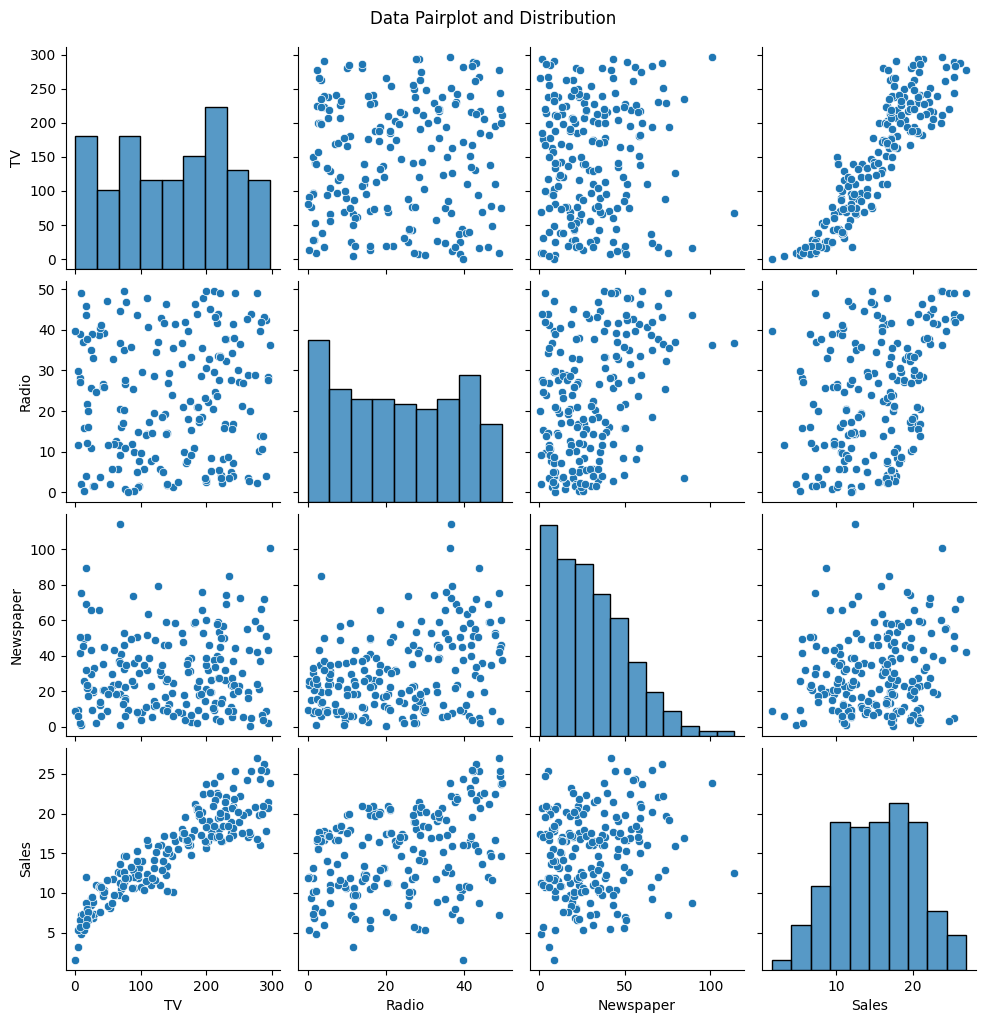

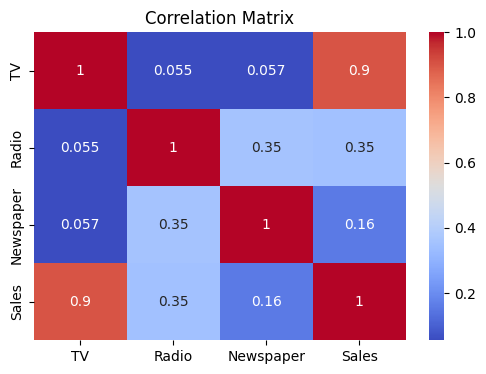

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.suptitle('Data Pairplot and Distribution',y=1.02)
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [3]:
data.shape

(200, 4)

In [4]:
# preprocessing
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [5]:
import numpy as np

In [6]:
print(data.columns.tolist())
X=data.drop("Sales", axis=1).values
y=data["Sales"].values

['TV', 'Radio', 'Newspaper', 'Sales']


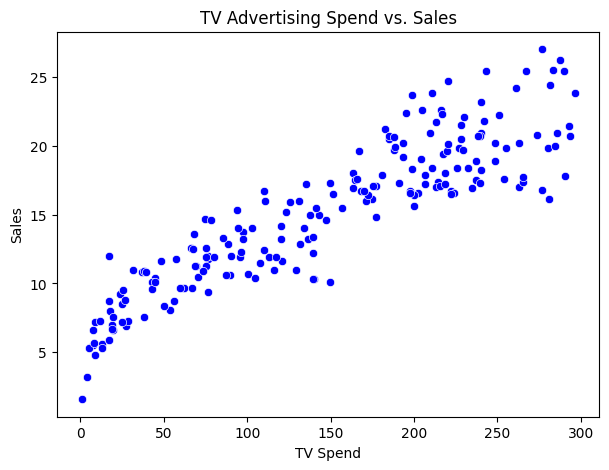

In [7]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='TV', y='Sales', data=data, color='blue')
plt.title('TV Advertising Spend vs. Sales')
plt.xlabel('TV Spend')
plt.ylabel('Sales')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_b =np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test_b = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
print("Shape of X_train_b:", X_train_b.shape)

Shape of X_train_b: (150, 4)


In [9]:
X = np.c_[np.ones(X.shape[0]), X]

In [10]:
def MSE(y,y_pred):
  return np.mean(np.power(y-y_pred,2))

In [11]:
def batch_sgd(X, y, lr=0.00001, epochs=1000):
    np.random.seed(0)
    n_samples, n_features = X.shape
    weights = np.random.randn(n_features)
    for epoch in range(epochs):
        y_pred = X.dot(weights)
        error = MSE(y, y_pred)
        grad = 2 * X.T.dot(error) / n_samples
        weights -= lr * grad
    return weights


In [12]:
def online_sgd(X, y, lr=0.00001, epochs=1000):
    np.random.seed(0)
    n_samples, n_features = X.shape
    weights = np.random.randn(n_features)
    for epoch in range(epochs):
        for i in range(n_samples):
            xi = X[i, :]
            yi = y[i]
            y_pred = xi.dot(weights)
            error = MSE(yi, y_pred)
            grad = 2 * xi * error
            weights -= lr * grad
    return weights


In [13]:
weights_batch = batch_sgd(X, y)
weights_online = online_sgd(X, y)
print("Batch SGD Weights:", weights_batch)
print("Online SGD Weights:", weights_online)

ValueError: operands could not be broadcast together with shapes (4,) (4,200) (4,) 

In [ ]:
new_point = np.array([1, 150, 20, 30])  # Include bias as 1
batch_pred = new_point.dot(weights_batch)
online_pred = new_point.dot(weights_online)
print("Batch SGD Prediction:", batch_pred)
print("Online SGD Prediction:", online_pred)
